# Q4)

In [144]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

p = 5
n = 1000

np.random.seed(10)
beta = np.ones(p)
X = np.random.normal(loc=0,scale=1,size=(n,p))

logits = 1/(1+np.exp(-X@beta))
y = np.random.binomial(n=np.ones(n).astype(int),p=logits, size = n)

## E)

In [145]:
# Fitting the logistic regression model
lr_model = LogisticRegression(random_state=0).fit(X, y)

logits_beta_hat = 1/(1+np.exp(-X@lr_model.coef_[0]))

# Fischer information matrix
fischer_info = np.zeros((p,p))
for i, sample in enumerate(X):
    fischer_info += np.outer(sample, sample) * logits_beta_hat[i] * (1 - logits_beta_hat[i])

fischer_info_inverse = np.linalg.inv(fischer_info)

# Calculating a statistic to make hypothesis testing
stats = (lr_model.coef_[0][1] - 1)/np.sqrt(np.abs(fischer_info_inverse[1,1]))

## F)

In [147]:
np.random.seed(10)
n_simulations = 1000
stats_list = []
beta_hat_list = []
beta_list = []
X_list = []
y_list = []
for simulation in range(n_simulations):
    beta = np.ones(p)
    X = np.random.normal(loc=0,scale=1,size=(n,p))

    logits = 1/(1+np.exp(-X@beta))
    y = np.random.binomial(n=np.ones(n).astype(int),p=logits, size = n)

    lr_model = LogisticRegression(random_state=0).fit(X, y)

    logits_beta_hat = 1/(1+np.exp(-X@lr_model.coef_[0]))

    fischer_info = np.zeros((p,p))
    for i, sample in enumerate(X):
        fischer_info += np.outer(sample, sample) * logits_beta_hat[i] * (1 - logits_beta_hat[i])

    fischer_info_inverse = np.linalg.inv(fischer_info)
    stats = (lr_model.coef_[0][1] - 1)/np.sqrt(fischer_info_inverse[1,1])

    # Saving the results and the used data
    stats_list.append(stats)
    beta_hat_list.append(lr_model.coef_[0])
    beta_list.append(beta)
    X_list.append(X)
    y_list.append(y)

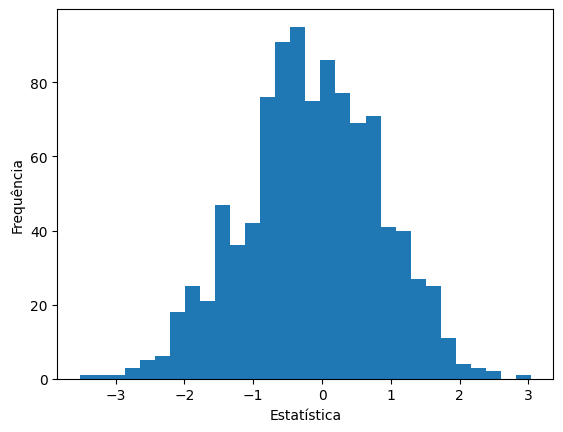

In [ ]:
plt.hist(stats_list, bins=30)
plt.ylabel('Frequency')
plt.xlabel('Statistics')
plt.show()

## E)

In [149]:
# Inverse of fisher information matrix using beta
fischer_info_beta = np.zeros((p,p))
print(beta_list)
for X, beta in zip(X_list, beta_list):
    print(X)
    logits_beta = 1/(1+np.exp(-X@beta))
    for i, sample in enumerate(X):
        fischer_info_beta += np.outer(sample, sample) * logits_beta[i] * (1 - logits_beta[i])
    

fischer_info_beta_inverse = np.linalg.inv(fischer_info_beta)
avg_fischer_info_beta_inverse = fischer_info_beta_inverse/n_simulations

# Inverse of fisher information matrix using beta_hat
fischer_info_beta_hat = np.zeros((p,p))
for X, logits in zip(X_list, beta_hat_list):
    logits_beta_hat = 1/(1+np.exp(-X@logits))
    for i, sample in enumerate(X):
        fischer_info_beta_hat += np.outer(sample, sample) * logits_beta_hat[i] * (1 - logits_beta_hat[i])

fischer_info_beta_hat_inverse = np.linalg.inv(fischer_info_beta_hat)
avg_fischer_info_beta_hat_inverse = fischer_info_beta_hat_inverse/n_simulations

[array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1.